## Let's get started

In [215]:
from pprint import pprint

Import neccessary python libraries for working with data and statistics

In [216]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import numpy as np
import pandas as pd
from scipy import stats as st
#import seaborn as sns
from sklearn.utils import shuffle

Load datasets

In [217]:
reds = pd.read_csv('./data/wineQualityReds.csv', index_col=0)
whites = pd.read_csv('./data/wineQualityWhites.csv', index_col=0)

Description of the data can be found [here](https://github.com/ludgo/udaWine/blob/master/data/Redirecting.txt). We are particularly interested in column decriptions:

Input variables (based on physicochemical tests):
   1. fixed acidity (tartaric acid - g / dm^3)
   2. volatile acidity (acetic acid - g / dm^3)
   3. citric acid (g / dm^3)
   4. residual sugar (g / dm^3)
   5. chlorides (sodium chloride - g / dm^3
   6. free sulfur dioxide (mg / dm^3)
   7. total sulfur dioxide (mg / dm^3)
   8. density (g / cm^3)
   9. pH
   10. sulphates (potassium sulphate - g / dm3)
   11. alcohol (% by volume)
Output variable (based on sensory data): 
   12. quality (score between 0 and 10)

To get intuition about data available, we look at some examples

In [218]:
redsSnippet = reds.head()
whitesSnippet = whites.head()

print('Red wines')
print(redsSnippet)
print()
print('White wines')
print(whitesSnippet)

Red wines
   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1            7.4              0.70         0.00             1.9      0.076   
2            7.8              0.88         0.00             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968  3.20       0.68   
3                 15.0                  54.0   0.9970  3.26       0.65   
4                 17.0                  60.0   0.9980  3.16       0.58   
5                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
1      9.4        5  
2      9.8        5  
3      9.8

We possess information that both datasets are polished and contain same parameters. That's why we can also join them. Notice that the number of white wines is disproportional to the number of red wines

In [219]:
wines = pd.concat([reds,whites], ignore_index=True)
print(wines.head())
wines.to_csv('./data/wineQuality.csv')

   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Basic statistics

We choose the quality column of integers. Then we can perform basic statistic operations

In [220]:
quality = shuffle(wines['quality'].copy()).reset_index(drop=True)

print('Wine quality')
print()

minimum = quality.min()
print('Worst: {}'.format(minimum))

maximum = quality.max()
print('Best: {}'.format(maximum))

mean = quality.mean()
print('Average: {}'.format(mean))

median = quality.median()
print('Middle: {}'.format(median))

mode = quality.mode()
print('Most frequent: {}'.format(mode.values))

Wine quality

Worst: 3
Best: 9
Average: 5.818377712790519
Middle: 6.0
Most frequent: [6]


We could continue, looking at concrete quartiles etc. ... However there is a built-in pandas' function to help us

In [221]:
print('All wines')
print(wines.describe())

All wines
       fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.00000

## Normal distribution

Following part works with white wines only.

We have alredy seen an example of sample standard deviation before. Now we continue with density

In [222]:
density = shuffle(whites['density'].copy()).reset_index(drop=True)

std = density.std()
print(std)

0.0029909069169369376


Imagine that the wines taking part at the competition would be all existing wines in the world. Thus they would be the entire population and we could calculate population standard deviation

In [223]:
popstd = density.std(ddof=0)
print(popstd)

0.002990601582148032


This is certainly not neccessarily true because we know that we did not collected all wines from all over the world. As often, visualization might be helpful. We have about 4900 white wines so that approximately **sqrt(4900)** will be number of bins

69 bins


(array([  11.,   20.,  119.,  252.,  339.,  411.,  462.,  482.,  425.,
         402.,  348.,  411.,  261.,  266.,  283.,  196.,  106.,   79.,
          14.,    4.,    2.,    2.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    2.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    1.]),
 array([ 0.98711   ,  0.98786174,  0.98861348,  0.98936522,  0.99011696,
         0.9908687 ,  0.99162043,  0.99237217,  0.99312391,  0.99387565,
         0.99462739,  0.99537913,  0.99613087,  0.99688261,  0.99763435,
         0.99838609,  0.99913783,  0.99988957,  1.0006413 ,  1.00139304,
         1.00214478,  1.00289652,  1.00364826,  1.0044    ,  1.00515174,
         1.00590348,  1.00665522,  1.00740696,  1.0081587 ,  1.00891043,
         1.00

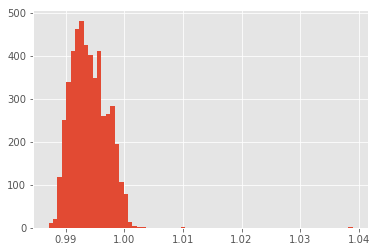

In [224]:
nbins = int(len(density)**0.5)
print('{} bins'.format(nbins))
plt.hist(density, bins=nbins)

For simplicity we remove outliers

In [225]:
density = pd.Series(st.trimboth(density, proportiontocut=.01))

Seems that the density may fall into normal distrubution. It would be strange just to say it is a normally distributed variable though. Fortunately, we know Central Limit Theorem which tells us that if we take same-sized samples, their means approximate normal distribution whether the population itself is normal or skewed

(array([  1.,   1.,   7.,  19.,  26.,  27.,  12.,   7.]),
 array([ 0.99283078,  0.99306992,  0.99330906,  0.9935482 ,  0.99378734,
         0.99402648,  0.99426562,  0.99450477,  0.99474391]),
 <a list of 8 Patch objects>)

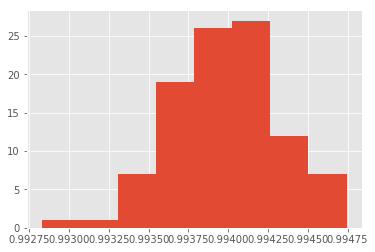

In [226]:
samples = []
samplesize = 64
nbins = int(samplesize**0.5)

for i in range(100):
    samples.append(density.sample(samplesize).mean())
samples = pd.Series(samples)
plt.hist(samples, bins=nbins)

We want to transfrom values to such a normal distribution that it has mean 0 and standard deviation 1. Initially, we need z-scores of the values. Z-score tells us how many standard deviations a value stands from the mean. We say we standardized the distribution. Plot is as follows

(array([ 0.01396551,  0.01396551,  0.09775857,  0.2653447 ,  0.36310327,
         0.37706878,  0.16758613,  0.09775857]),
 array([-3.45844767, -2.74239794, -2.02634821, -1.31029848, -0.59424876,
         0.12180097,  0.8378507 ,  1.55390043,  2.26995015]),
 <a list of 8 Patch objects>)

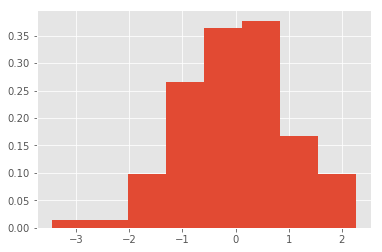

In [227]:
zscores = st.zscore(samples)
plt.hist(zscores, bins=nbins, normed=1)

Then population mean will be same as sample mean

In [228]:
mean = samples.mean()
print(mean)

0.99398580625


... and population standard deviation can be obtained by next formula. We call sample standard deviation also standard error

In [229]:
standardError = samples.std()
popstd = standardError * len(samples)**0.5
print(popstd)

0.0033565458119062205


Ok. Something different again. If density does really copy normal distribution, we can ask different questions

In [230]:
normDensity = st.zscore(density)

for i in [.8, .9, .95, .99]:
    print('How many white wines at competition are at world top {}% ?'.format(100-int(100*i)))
    zcritical = st.norm.ppf(i)
    print(len(normDensity[normDensity > zcritical]))

How many white wines at competition are at world top 20% ?
1093
How many white wines at competition are at world top 10% ?
675
How many white wines at competition are at world top 5% ?
305
How many white wines at competition are at world top 1% ?
0


## Z - test

In fact, dozens of competitions are held every wine season across many countries all over the world. From a huge ammount of data, which can be considered to be the world wine population, imagine we know average competition white wine density is characterized by mean and standard deviation. An expert comes, points the numbers out and claimes that the density at this competition was manipulated. He says somebody either poured water to increase wine density or added alcohol to decrease it, such that it influenced quality results.

We can carry out two-tailed hypothesis testing to check it out. Now we consider all competition data to be a sample. Null hypothesis states expert's mean and competition's mean are equal, alternative hypothesis not equal.

In [231]:
popmean = .995
print('Population mean: {}'.format(popmean))
popstd = .002
print('Population standard deviation: {}'.format(popstd))
mean = density.mean()
print('Sample mean: {}'.format(mean))
std = density.std()
print('Sample standard deviation: {} (We do not need this.)'.format(std))

Population mean: 0.995
Population standard deviation: 0.002
Sample mean: 0.9940043221574292
Sample standard deviation: 0.002793556248393701 (We do not need this.)


Then we test at different alpha levels

In [232]:
zscore = (mean - popmean) / popstd
print('Z-score: {}'.format(zscore))

nulltrue = 2*st.norm.sf(abs(zscore))
print('The probability of null hypothesis is {}% so'.format(round(100*nulltrue, 2)))

for critical in [.05,.01,.005]:
    if critical > nulltrue:
        print('reject null hypothesis at {}% confidence interval.'.format(100*critical))
    else:
        print('do not reject null hypothesis at {}% confidence interval.'.format(100*critical))

Z-score: -0.4978389212854095
The probability of null hypothesis is 61.86% so
do not reject null hypothesis at 5.0% confidence interval.
do not reject null hypothesis at 1.0% confidence interval.
do not reject null hypothesis at 0.5% confidence interval.


Seems that 'the expert' was not right at all. However, do we know for sure that he was 100% wrong. No. What if he was right and we would rejected null hypothesis? We would show just that density at this competition was different from the usual one at chosen confidence interval. Another problem is that the change itself does not always imply manipulation. To get a bit more confused, we have even not proved that density influences somehow the quality of wine, so that competition could be manipulated in this way without influence on results. Statistics brings us quite complicated decision process and there is almost always something more to consider.

Here I will try to summarize types of z-tests:

- single value z-test:

We compare a concrete value to the corresponding population parameter, namely for example mean, variance or proportion

- difference value z-test:

We compare a parameter between two populations, namely for example mean, variance or proportion

## T - test

We continue with red wines, specifically how much alcohol they contain.

For purpose of this section we model only small competition with 20 wines participating in

In [246]:
alcohol = shuffle(reds['alcohol'].copy()).reset_index(drop=True)[:20]
print(alcohol)

0     10.80
1      9.80
2     10.60
3     11.00
4     11.40
5     11.30
6     10.40
7      9.30
8      9.50
9     10.40
10     9.40
11    10.80
12    11.40
13    10.50
14     9.55
15     9.90
16    10.50
17     9.70
18     9.40
19    10.20
Name: alcohol, dtype: float64


Next, we are going to react to the suggestion that the competition was manipulated by systematically adding alcohol to wines, assuming known population mean at similar competitions.

We perform one-tailed t-test. Null hypothesis states the percentage of alcohol is equal or less than at similar competitions, alternative hypothesis greater than

In [247]:
popmean = 10.
print('Population mean: {}'.format(popmean))
print('Population standard deviation: unknown')
mean = alcohol.mean()
print('Sample mean: {}'.format(mean))
std = alcohol.std()
print('Sample standard deviation: {}'.format(std))

Population mean: 10.0
Population standard deviation: unknown
Sample mean: 10.2925
Sample standard deviation: 0.6959043718334021


Then we test at different alpha levels

In [248]:
#tscore = (mean - popmean) / std * len(alcohol)**0.5
tscore, twosidedp = st.ttest_1samp(alcohol, popmean)
print('T-score: {}'.format(tscore))

nulltrue = twosidedp / 2
print('The probability of null hypothesis is {}% so'.format(round(100*nulltrue, 2)))

for critical in [.05,.01,.005]:
    if critical > nulltrue:
        print('reject null hypothesis at {}% confidence interval.'.format(100*critical))
    else:
        print('do not reject null hypothesis at {}% confidence interval.'.format(100*critical))

T-score: 1.8797119543754424
The probability of null hypothesis is 3.78% so
reject null hypothesis at 5.0% confidence interval.
do not reject null hypothesis at 1.0% confidence interval.
do not reject null hypothesis at 0.5% confidence interval.


Here I will try to summarize types of t-tests:

- ONE sample t-test:

We compare the mean of *single sample* to a concrete value (*n - 1* degrees of freedom)

- TWO sample t-test:

We compare the mean difference of two *independent samples* to a concrete value (*n1 + n2 - 1* degrees of freedom)

- PAIRED t-test: 

We compare the mean difference of two *dependent* or *paired samples* to a concrete value (*n - 1* degrees of freedom)

- CORRELATION t-test:

We compare *correlation coefficient* values to zero (*n - 2* degrees of freedom)

- REGRESSION t-test:

We compare *regression coefficient* values to zero